In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("SalaryData_Train.csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv("SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K



# Summary of training data

In [4]:
df.isnull().value_counts()

age    workclass  education  educationno  maritalstatus  occupation  relationship  race   sex    capitalgain  capitalloss  hoursperweek  native  Salary
False  False      False      False        False          False       False         False  False  False        False        False         False   False     30161
dtype: int64

In [5]:
test.isnull().value_counts()

age    workclass  education  educationno  maritalstatus  occupation  relationship  race   sex    capitalgain  capitalloss  hoursperweek  native  Salary
False  False      False      False        False          False       False         False  False  False        False        False         False   False     15060
dtype: int64

In [6]:
df.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
#Finding the special characters in the data frame
test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
# view the categorical variables
df[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [13]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [14]:
# view frequency distribution of categorical variables in ratio(percentage)

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

C:\Users\Manohar kr sinha\AppData\Local\Temp\ipykernel_4704\2362562906.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\Manohar kr sinha\AppData\Local\Temp\ipykernel_4704\2362562906.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df))

In [15]:
# check labels in workclass variable

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [16]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
df.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
# check frequency distribution of values in native_country variable

df.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [19]:
# check for labels in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [20]:
# print categorical variables with missing data

for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

In [21]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# FEATURE AND TARGET VARIABLE

In [22]:
X = df.drop(['Salary'],axis=1)

In [23]:
y=df["Salary"]

# training and testing dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [25]:
# encode remaining variables with pd.get_dummies

xtrain = pd.get_dummies(X_train)
xtest = pd.get_dummies(X_test)

In [26]:
xtrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
23630,38,16,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11176,66,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8356,55,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3220,25,14,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6212,21,10,0,0,15,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,66,16,3273,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19648,26,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9845,50,13,0,0,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10799,49,13,0,0,60,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
xtest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
25338,21,9,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
18840,21,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8391,56,13,0,0,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
18258,43,10,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16669,53,13,0,0,50,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,38,13,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
811,49,5,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8213,20,10,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22206,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# if we perform pd.get_dummies before train and test split then we have to remove columns of salary 
# and sex_male or female , because they have only two labels , so problem of collinearity may rises 

# Standerization if required¶

In [29]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
xtrain2 = sc.fit_transform(xtrain)
xtest2 =sc.fit_transform(xtest)


In [30]:
#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()


# gausian naive bayes model creation

In [31]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(xtrain2,y_train)

GaussianNB()

# Model Validation

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [33]:
y_pred = model.predict(xtest2)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [34]:
confusion_matrix(y_test,y_pred)

array([[4546, 1141],
       [ 369, 1485]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.7997613048667286

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      5687
        >50K       0.57      0.80      0.66      1854

    accuracy                           0.80      7541
   macro avg       0.75      0.80      0.76      7541
weighted avg       0.84      0.80      0.81      7541



In [37]:
# even the standarization algorithm affects the accuracy

# standard scaler shows 75% accuracy while RobustScaler shows 79 % accuracy.

In [38]:
# checking overfitting and underfitting

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(xtrain2, y_train)))

print('Test set score: {:.4f}'.format(model.score(xtest2, y_test)))

Training set score: 0.8033
Test set score: 0.7998


In [40]:
# now checking the data for test data that is SalaryData_Test.csv

In [41]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [42]:
# selecting feature and target for test data

In [43]:
X3=test.drop(['Salary'],axis=1)
y3=test['Salary']

In [44]:
# using label encoder for test data X3

In [45]:
x3=pd.get_dummies(X3)

In [46]:
# using RobustScaler for standarization

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

xscaled = scaler.fit_transform(x3)



In [48]:
y_prednew = model.predict(xscaled)

In [49]:
accuracy_score(y3,y_prednew)

0.800929614873838

In [50]:
# so the accuracy score for new data set salaryData.csv is still 80%.

# confusion matrix

In [51]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4546 1141]
 [ 369 1485]]

True Positives(TP) =  4546

True Negatives(TN) =  1485

False Positives(FP) =  1141

False Negatives(FN) =  369


<AxesSubplot:>

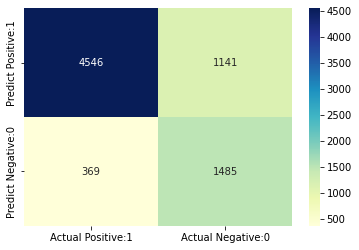

In [52]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# classification metrics

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      5687
        >50K       0.57      0.80      0.66      1854

    accuracy                           0.80      7541
   macro avg       0.75      0.80      0.76      7541
weighted avg       0.84      0.80      0.81      7541



# calculate class probability

In [54]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model.predict_proba(xtest2)[0:10]

y_pred_prob

array([[9.99953989e-01, 4.60110566e-05],
       [9.95864388e-01, 4.13561245e-03],
       [8.65438790e-01, 1.34561210e-01],
       [9.99999912e-01, 8.81349141e-08],
       [8.22537899e-02, 9.17746210e-01],
       [9.99557739e-01, 4.42260849e-04],
       [5.57617029e-06, 9.99994424e-01],
       [6.62925474e-01, 3.37074526e-01],
       [5.56888590e-04, 9.99443111e-01],
       [9.99999599e-01, 4.01481849e-07]])

In [55]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = model.predict_proba(xtest2)[:, 1]

Text(0, 0.5, 'Frequency')

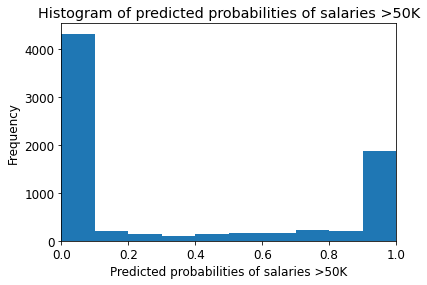

In [56]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [57]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain2, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80415561 0.81034483 0.79885057 0.80415561 0.81167109 0.78381963
 0.81299735 0.79752431 0.79442971 0.81167109]


In [58]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8030
